In this example, I will try to analyze the popularity of names from the wonderful series of Game Of Thrones.

1) Get data from the Social Security site https://www.ssa.gov/oact/babynames/limits.html

2) Analyze names popularity across the show's popularity (before, during the show, after)

Let's get started!

In [67]:
# Importing necessary libs

import os
import zipfile
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [68]:
# Setting config for matplotlib

%matplotlib inline 

In [69]:
# Extracting data from the zip archive

zipfile.ZipFile('names.zip').extractall('names')

In [70]:
# Checking extracted data in names folder
# An example, we get the first 10 files from names folder

os.listdir('names')[:10]

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2015.txt',
 'yob2001.txt']

In [71]:
# Let's check data in files
# For example, we read data from yob2018.txt file, first 10 lines

open('names/yob2018.txt', 'r').readlines()[:10]

['Emma,F,18688\n',
 'Olivia,F,17921\n',
 'Ava,F,14924\n',
 'Isabella,F,14464\n',
 'Sophia,F,13928\n',
 'Charlotte,F,12940\n',
 'Mia,F,12642\n',
 'Amelia,F,12301\n',
 'Harper,F,10582\n',
 'Evelyn,F,10376\n']

In [72]:
# Let's try to work with data

names2018 = pd.read_csv('names/yob2018.txt', names=['name', 'sex', 'number'])

In [73]:
# Checking data
names2018.head()

,name,sex,number
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928


In [74]:
# Let's get data for analysis from files
# As we know the show started in April 2011 until May 2019
# and our range are between 2011 and 2019 (unfortunately, we have data till 2018!)

names_list = []

for year in range(2011, 2018+1):
    names_list.append(pd.read_csv(f'names/yob{year}.txt', names=['name', 'sex', 'number']))
    names_list[-1]['year'] = year
    
years = pd.concat(names_list)

In [75]:
# Checking top result

years.head()

,name,sex,number,year
0,Sophia,F,21842,2011
1,Isabella,F,19910,2011
2,Emma,F,18803,2011
3,Olivia,F,17322,2011
4,Ava,F,15503,2011


In [76]:
# Checking bottom result

years.tail()

,name,sex,number,year
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018
32032,Zzyzx,M,5,2018


Now, we finished our first part of the analysis.

Time to analyze data which we got in previous steps.

In [77]:
# Let's sort extracted data

years_indexed = years.set_index(['sex', 'name', 'year']).sort_index()

# and check results

years_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
              2016       7
    Aabidah   2018       5
    Aabriella 2014       5
              2015       5
              2016      11
              2017       6
              2018       6
    Aada      2015       5
              2018       8
    Aadaya    2018       8
    Aadhira   2012       6
              2013      10
              2014      13
              2015       8
              2016      14
              2017      26
              2018      30
    Aadhvika  2016       9
              2018       8
    Aadhya    2011      52
              2012     110
              2013     172
              2014     249
              2015     265
              2016     284
              2017     291
...                    ...
M   Zyrion    2015       7
              2016       8
    Zyron     2011      17
              2012      12
              2013       9
              2014      13
              2015      15
              2016      12
              2017      15
              2018       5
    Zyrus     2012       5
              2013       8
              2014      10
              2015       5
              2016       6
              2017       7
              2018       8
    Zyshawn   2011       5
              2012      10
              2013      13
              2014       6
    Zytaevius 2012       5
    Zytaveon  2011       9
              2014       8
    Zytavion  2011       5
    Zyus      2015       5
              2018       6
    Zyvon     2015       7
    Zyyon     2014       6
    Zzyzx     2018       5

[264934 rows x 1 columns]

In [78]:
# Awesome!

In [79]:
# Now we need data processing to get proper (targeting) results

def plot_name(sex, name):
    data = years_indexed.loc[sex, name]
    
    pp.plot(data.index, data.values)

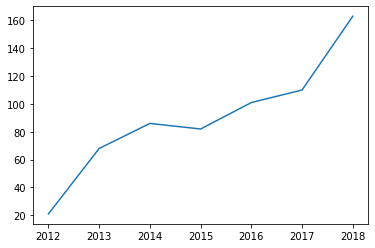

In [80]:
# Let's try to search Daenerys Targaryen

plot_name('F', 'Daenerys')

In [81]:
# Wow! Looks like we have more than 160 children with this name

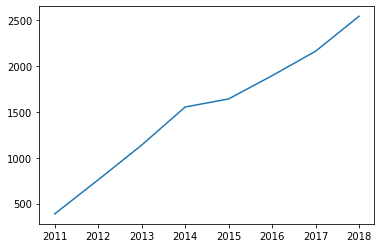

In [82]:
# Let's try someone another, for example Arya Stark

plot_name('F', 'Arya')

In [83]:
# WOW! More than 2500 children with name Arya

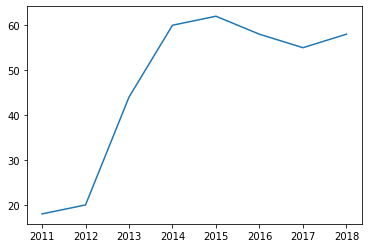

In [84]:
# Ok, how about Tyrion Lannister, let's check

plot_name('M', 'Tyrion')

In [85]:
# Hm! Look like we got something. Interesting!

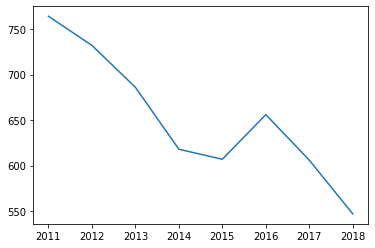

In [86]:
# At the end, let's try to check Jaime Lannister

plot_name('M', 'Jaime')

In [87]:
# So strange! How this line correlate with popularity? I have no idea for now.

By some reason, some names do not exist in our years' range, for example, Eddard or Joffrey.

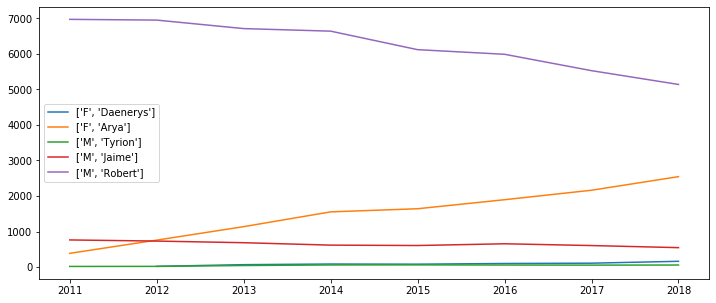

In [88]:
# Let's try see who is the most popular

pp.figure(figsize=(12,5))

names = [
    ['F','Daenerys'],   # Targaryen 
    ['F', 'Arya'],      # Stark
    ['M','Tyrion'],     # Lannister
    ['M', 'Jaime'],     # Lannister
    # ['M', 'Eddard'],  # Stark       # does not exist
    ['M', 'Robert'],    # Baratheon
    # ['F', 'Cersei'],  # Lannister   # do not have enough data
    # ['M', 'Jorah'],   # Mormont     # do not have enough data
    # ['M', ' Drogo'],  # Khal        # does not exist
    # ['F', 'Sansa'],   # Stark       # do not have enough data
]

for name in names:
    plot_name(name[0], name[1])
    
pp.legend(names)

According to the above information, Arya is the most popular name in our experiment!
We do not count name Robert because this name is widespread.